# 선형회귀분석의 개념과 원리

- 머신 러닝의 가장 큰 목적은 실제 데이터를 바탕으로 모델을 생성해서 만약 다른 입력 값을 넣었을 때 발생할 아웃풋을 예측하는 데에 있다. 이때 우리가 찾아낼 수 있는 가장 직관적이고 간단한 모델은 선(line)이다. 그래서 데이터를 놓고 그걸 가장 잘 설명할 수 있는 선을 찾는 분석하는 방법을 선형 회귀(Linear Regression) 분석이라 부른다.

-  선형 회귀 모델의 목표는 모든 데이터로부터 나타나는 오차의 평균을 최소화할 수 있는 최적의 기울기와 절편을 찾는 거다.

- 손실을 최소화 하기 위한 방법, 경사하강법(Gradient Descent) 사용한다.(미분사용)

## 다중회귀분석의 직관적 이해

- 독립변수가 2개 이상인 경우에 분석하는 방법

- 여러 독립변수들을 고려한다면 예측과 영향관계를 더욱 잘 표현됨

- 단일회귀분석보다 다중회귀분석이 실제 분석에서 더 많이 사용됨


### 통제의 의미 

- 다른 변수들의 영향을 통제한 상태에서 개별 독립변수들이 종속변수에 실제로 미치는 영향의 정도를 파악한다.

- 예) 만약 학생의 과외시간이 성적에 미치는 영향을 분석하여 다음과 같이 회귀계수가 나왔다. 

과외시간 -> 성적,회귀계수:2.332, 즉 과외시간이 1시간 증가하면 성적이 2.3점 향상되었다.

그러나 연구자는 과외시간은 학생 부모의 소득에 영향을 받는다고 하여 회귀분석에 부모의 소득을 같이 투입했다. -> 성적에 대한 회귀계수가 줄었다.

회귀계수:1.334, 즉 과외시간 1시간 증가하면 성적이 1.3점 증가하였다. 왜 일까?

이는 바로 '부모의 소득'을 통제하였기 때문이다. 통제란 '소득이 같다고 할때이다'의 의미이다.

따라서 부모의 소득을 통제(동일)한 경우 과외시간이 성적에 미치는 순수한 효과가 된다.


# 실습과 시각화

In [1]:
a<-read.csv('cosmetics.csv',header = T)

In [2]:
a

gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3
2,2,2,7,3,1,2,100000,2,1,4,2,3,3,4,4,3
2,1,6,4,5,1,5,100000,3,2,5,2,3,2,2,3,4
1,1,6,4,5,4,10,39000,3,2,2,1,2,4,4,4,4
2,2,4,5,2,2,2,40000,3,2,3,2,3,3,4,4,4
2,2,4,5,2,1,2,100000,3,3,3,1,3,2,3,4,4


In [3]:
attach(a)

- 구매문의 만족, 전반만족도

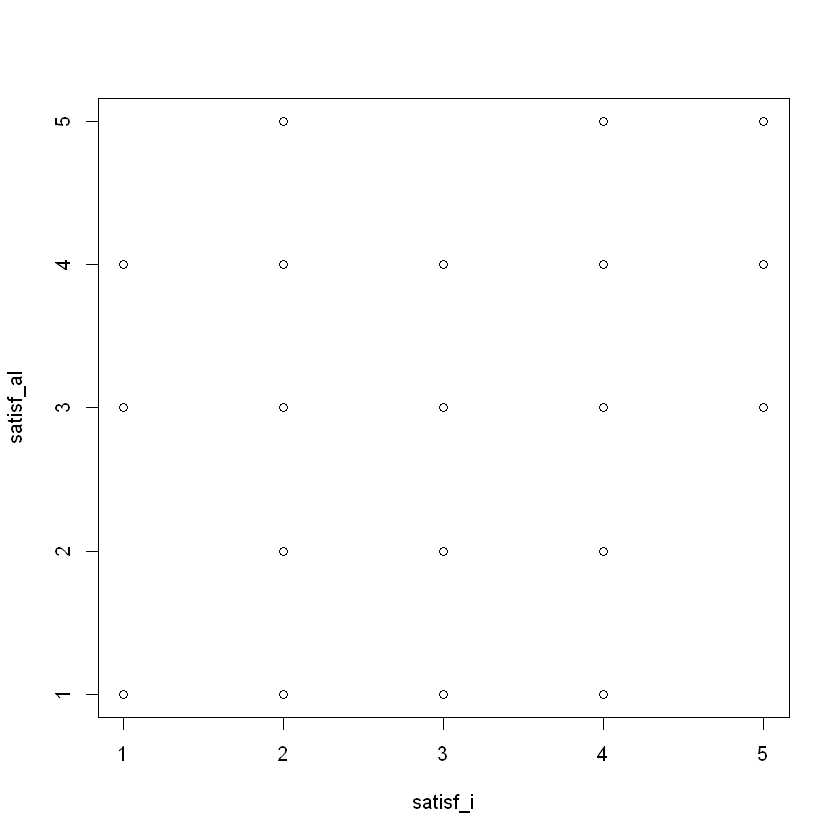

In [4]:
plot(satisf_i,satisf_al)

In [5]:
install.packages('pequod')

package 'pequod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MyCom\AppData\Local\Temp\RtmpGEavwu\downloaded_packages


In [6]:
library(pequod)

Warning message:
"package 'pequod' was built under R version 3.6.3"Loading required package: ggplot2
Loading required package: car
Loading required package: carData


In [7]:
model1 <- lm(satisf_al~satisf_i,data=a) # (종속~독립변수1+독립변수2....)

In [8]:
model1


Call:
lm(formula = satisf_al ~ satisf_i, data = a)

Coefficients:
(Intercept)     satisf_i  
      1.657        0.530  


In [9]:
summary(model1)


Call:
lm(formula = satisf_al ~ satisf_i, data = a)

Residuals:
   Min     1Q Median     3Q    Max 
-2.777 -0.247  0.223  0.223  2.283 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.65689    0.16472   10.06   <2e-16 ***
satisf_i     0.53002    0.04701   11.28   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.612 on 245 degrees of freedom
Multiple R-squared:  0.3416,	Adjusted R-squared:  0.339 
F-statistic: 127.1 on 1 and 245 DF,  p-value: < 2.2e-16


- Multiple R-squared:  0.3416 (의미)

R의 값이 1에 가까울수록 선형회귀 직선에 데이터가 몰려있는것이고 0에 가까울 수록 데이터가 직선에서 멀리 떨어져 있는 것이다.

- 'p-value'<2.2e-16' 의 의미는 2.2 앞에 0이 16개 있는 값( 2.2 x 10 - 16승)보다 작다는 의미이다. p-value가 0.05 보다 작기 때문에 이 분석 결과는 통계적으로 유의하다'고 해석할 수 있다 . 대립가설 성립 (의미가 있다.,관련이 있다.)

- satisf_i , Estimate(회귀계수,기울기) 0.53002  (의미) 

> 구매문의만족도가 1씩 증가할때 종속변수(전반만족도)가 약 0.53 씩 증가한다.

- Estimate/Error = t value (검정통계량)

- t value 값이 2 이하 일때 귀무가설 성립, 11.28이므로 대립가설 성립한다.

- 결론적으로 Estimate 값이 크고 t value 값이 크고 Pr 값이 0.05보다 작을때 대립가설 성립, 통계적으로 유의하다.

`geom_smooth()` using formula 'y ~ x'


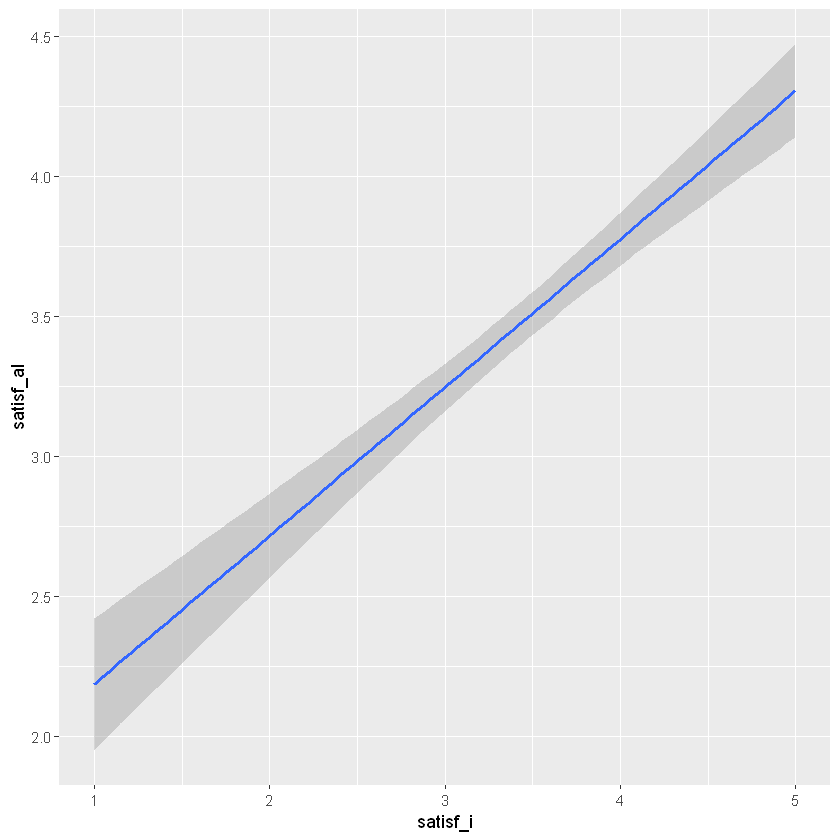

In [11]:
ggplot(a,aes(x=satisf_i, y=satisf_al)) + geom_smooth(method=lm)

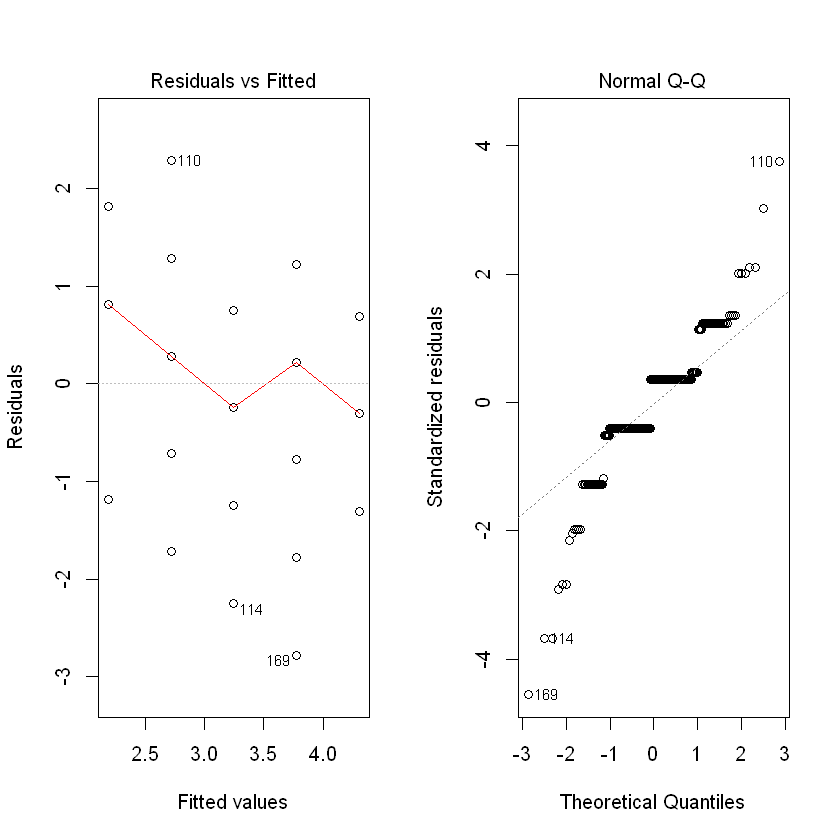

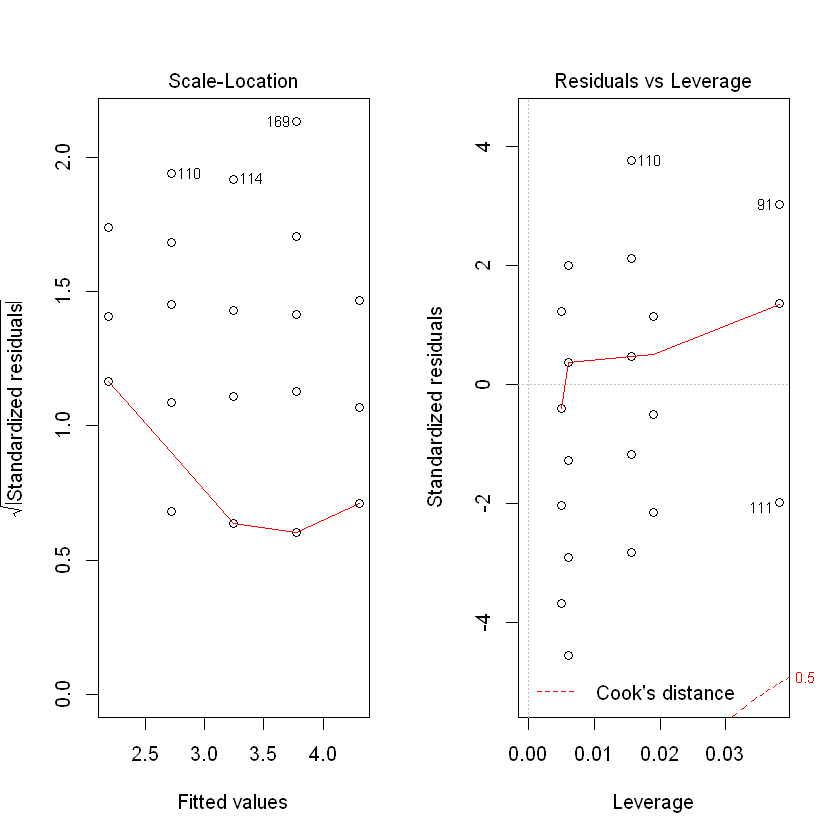

In [13]:
par(mfrow=c(1,2)) #110,114,169 제거하는게 좋음
plot(model1)

In [14]:
# 잔차가 많이 벗어나있는 데이터 확인후 제거해주는게 좋다

outlierTest(model1)

     rstudent unadjusted p-value Bonferroni p
169 -4.747353         3.5150e-06    0.0008682
110  3.865612         1.4213e-04    0.0351060
114 -3.779172         1.9784e-04    0.0488660
237 -3.779172         1.9784e-04    0.0488660

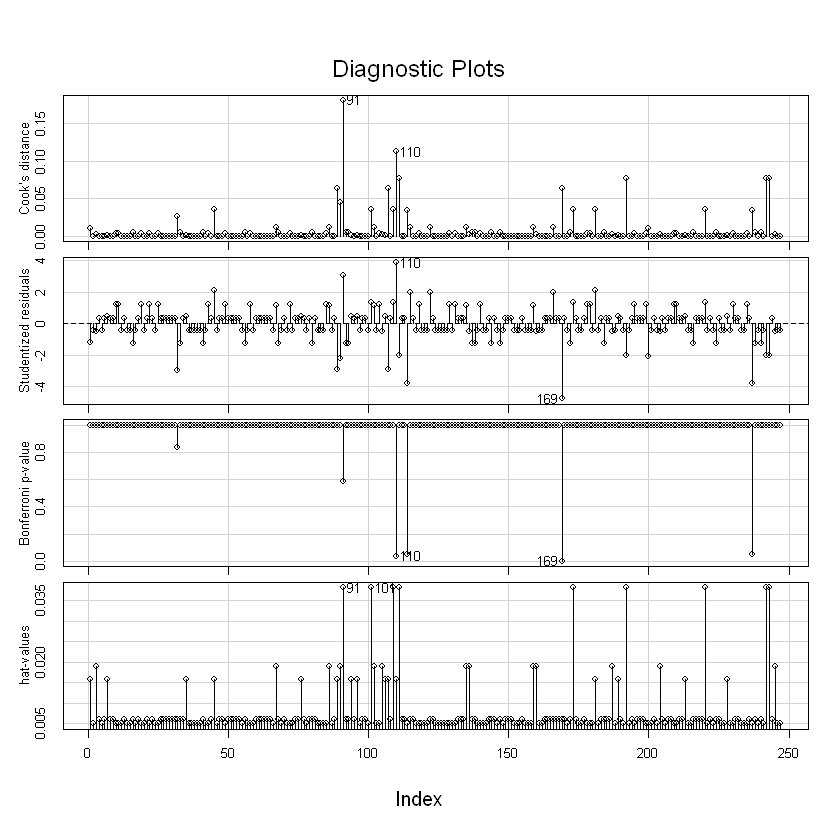

In [15]:
influenceIndexPlot(model1)

In [16]:
a$pre<-model1$fitted.values #예측값 

In [18]:
a # pre 칼럼 생성됨
# satisf_i 값이 2일때 실제값 satisf_al 2인데 pre(예측값)은 2.716933이다.
# 예측값- 실제값 = 잔차 이다.


gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase,pre
1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2,2.716933
2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4,3.246955
2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4,4.306998
2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4,3.776976
1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3,3.246955
2,2,2,7,3,1,2,100000,2,1,4,2,3,3,4,4,3,3.776976
2,1,6,4,5,1,5,100000,3,2,5,2,3,2,2,3,4,2.716933
1,1,6,4,5,4,10,39000,3,2,2,1,2,4,4,4,4,3.776976
2,2,4,5,2,2,2,40000,3,2,3,2,3,3,4,4,4,3.776976
2,2,4,5,2,1,2,100000,3,3,3,1,3,2,3,4,4,3.246955


In [19]:
# 잔차 저장
a$res <-model1$residuals

In [20]:
a


gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase,pre,res
1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2,2.716933,-0.7169334
2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4,3.246955,-0.2469549
2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4,4.306998,-0.3069979
2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4,3.776976,0.2230236
1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3,3.246955,-0.2469549
2,2,2,7,3,1,2,100000,2,1,4,2,3,3,4,4,3,3.776976,0.2230236
2,1,6,4,5,1,5,100000,3,2,5,2,3,2,2,3,4,2.716933,0.2830666
1,1,6,4,5,4,10,39000,3,2,2,1,2,4,4,4,4,3.776976,0.2230236
2,2,4,5,2,2,2,40000,3,2,3,2,3,3,4,4,4,3.776976,0.2230236
2,2,4,5,2,1,2,100000,3,3,3,1,3,2,3,4,4,3.246955,0.7530451


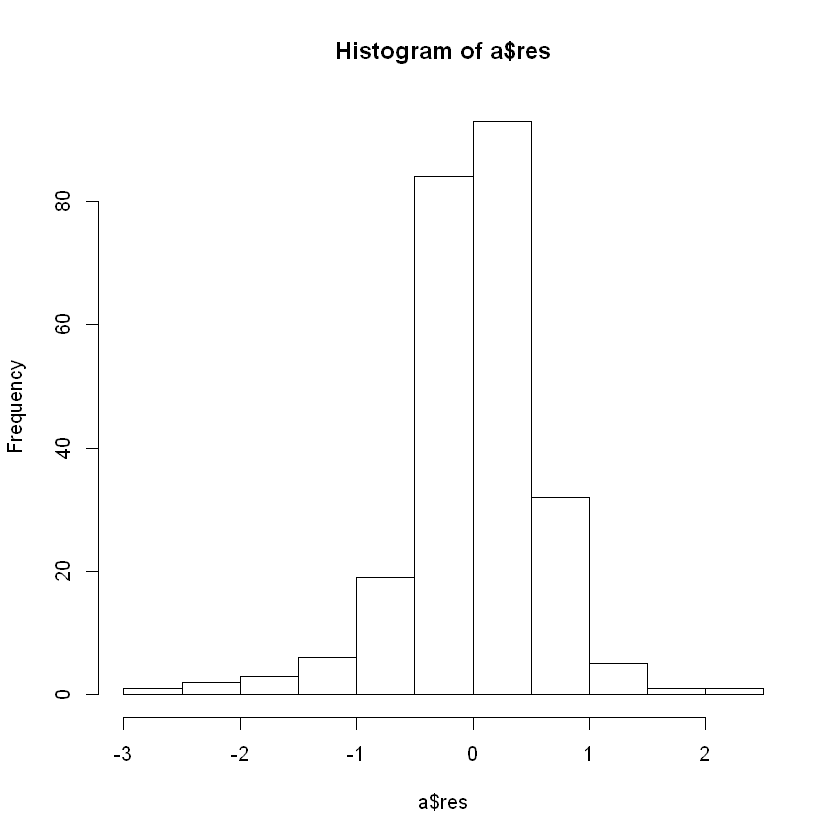

In [21]:
hist(a$res)

- 0이 실제값과 예측값이 일치하는 정도이다.

- 데이터가 0에 많이 있으므로 정규분포에 만족한다

In [22]:
# 독립변수 추가해보기  /satisf_b는 구매가격 만족
model2 <-lm(satisf_al~satisf_i+satisf_b, data=a)

In [23]:
model2


Call:
lm(formula = satisf_al ~ satisf_i + satisf_b, data = a)

Coefficients:
(Intercept)     satisf_i     satisf_b  
    1.77190      0.53072     -0.04061  


In [24]:
summary(model2) # satisf_b 는 귀무가설에 따른다.


Call:
lm(formula = satisf_al ~ satisf_i + satisf_b, data = a)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8542 -0.2422  0.1864  0.2677  2.2479 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.77190    0.21730   8.154 1.85e-14 ***
satisf_i     0.53072    0.04705  11.281  < 2e-16 ***
satisf_b    -0.04061    0.05000  -0.812    0.417    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6124 on 244 degrees of freedom
Multiple R-squared:  0.3434,	Adjusted R-squared:  0.338 
F-statistic: 63.81 on 2 and 244 DF,  p-value: < 2.2e-16


In [26]:
install.packages('QuantPsyc')

package 'QuantPsyc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MyCom\AppData\Local\Temp\RtmpGEavwu\downloaded_packages


In [30]:
require(QuantPsyc)

In [33]:
model22 <- lm.beta(model2)

In [37]:
model22 

#standardized 값나옴 / 여러 독립변수 중에 어느 독립변수가 종속변수에 얼마나 영향을 미치는지 알수있음


satisf_i    satisf_b 
 0.58528060 -0.04213923

- satisf_i 가 satisf_b 비해 종속변수에 큰 영향을 미침